<a href="https://colab.research.google.com/github/icaromsc/machineLearning/blob/master/clustering_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset
Importing dataset and extract columns

In [0]:

print(__doc__)

import numpy as np
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

data_path="sample_data/california_housing_test.csv"
df1 = pd.read_csv(data_path, index_col=0)
#print(df1)
#filtered_df=df1[['housing_median_age', 'median_house_value']]
filtered_df=df1[['housing_median_age', 'median_income']]
#print(filtered_df)
# print(sports[:2:1])
array=filtered_df.values
#print(array)

Automatically created module for IPython interactive environment
[[27.      6.6085]
 [43.      3.599 ]
 [27.      5.7934]
 ...
 [10.      2.2895]
 [40.      3.2708]
 [42.      8.5608]]


# DBSCAN clustering algorithm
###Finds core samples of high density and expands clusters from them.

A demo of the DBSCAN clustering algorithm using California housing data from the 1990 US Census; more information is available at: https://developers.google.com/machine-learning/crash-course/california-housing-data-description


eps value: 0.100
Estimated number of clusters: 23
Estimated number of noise points: 687
Silhouette Coefficient: -0.392
Calinski harabasz Coefficient: 54.622


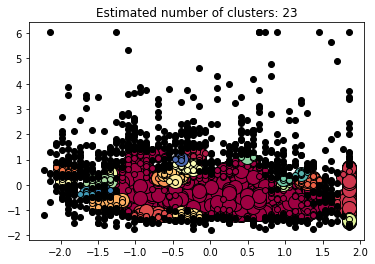

eps value: 0.200
Estimated number of clusters: 2
Estimated number of noise points: 169
Silhouette Coefficient: 0.286
Calinski harabasz Coefficient: 279.870


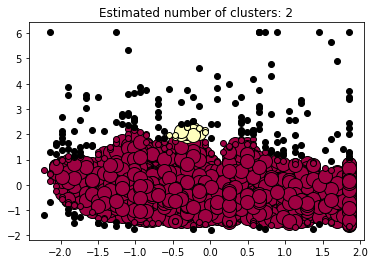

eps value: 0.250
Estimated number of clusters: 2
Estimated number of noise points: 108
Silhouette Coefficient: 0.314
Calinski harabasz Coefficient: 280.247


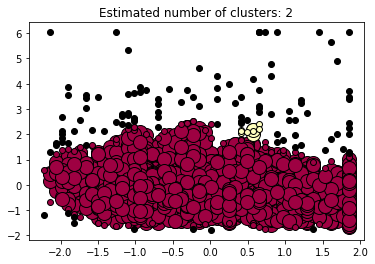

eps value: 0.300
Estimated number of clusters: 1
Estimated number of noise points: 82
Silhouette Coefficient: 0.558
Calinski harabasz Coefficient: 523.935


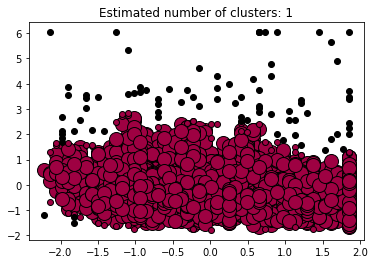

In [0]:
X = array
labels_true = array

X = StandardScaler().fit_transform(X)
quans=[0.1,0.2,0.25,0.3]
for i in quans:

  # #############################################################################
  # Compute DBSCAN
  db = DBSCAN(eps= i, min_samples=10).fit(X)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_

  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
  print('eps value: %0.3f' % i)
  print('Estimated number of clusters: %d' % n_clusters_)
  print('Estimated number of noise points: %d' % n_noise_)
  # print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
  # print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
  # print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
  # print("Adjusted Rand Index: %0.3f"
  #       % metrics.adjusted_rand_score(labels_true, labels))
  # print("Adjusted Mutual Information: %0.3f"
  #       % metrics.adjusted_mutual_info_score(labels_true, labels,
  #                                            average_method='arithmetic'))
  print("Silhouette Coefficient: %0.3f"
        % metrics.silhouette_score(X, labels))

  print("Calinski harabasz Coefficient: %0.3f"
        % metrics.calinski_harabasz_score(X, labels))

  # #############################################################################
  # Plot result
  import matplotlib.pyplot as plt

  # Black removed and is used for noise instead.
  unique_labels = set(labels)
  colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
      if k == -1:
          # Black used for noise.
          col = [0, 0, 0, 1]

      class_member_mask = (labels == k)

      xy = X[class_member_mask & core_samples_mask]
      plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
               markeredgecolor='k', markersize=14)

      xy = X[class_member_mask & ~core_samples_mask]
      plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
               markeredgecolor='k', markersize=6)

  plt.title('Estimated number of clusters: %d' % n_clusters_)
  plt.show()


# Mean-shift clustering algorithm
A demo of the mean-shift clustering algorithm  using  California housing data from the 1990 US Census; more information is available at: https://developers.google.com/machine-learning/crash-course/california-housing-data-description

Reference:

Dorin Comaniciu and Peter Meer, “Mean Shift: A robust approach toward feature space analysis”. IEEE Transactions on Pattern Analysis and Machine Intelligence. 2002. pp. 603-619.


quantile value value: 0.100
Silhouette Coefficient: 0.386
Calinski harabasz Coefficient: 6635.128
number of estimated clusters : 12


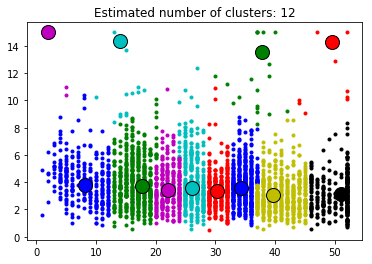

quantile value value: 0.200
Silhouette Coefficient: 0.476
Calinski harabasz Coefficient: 8237.643
number of estimated clusters : 4


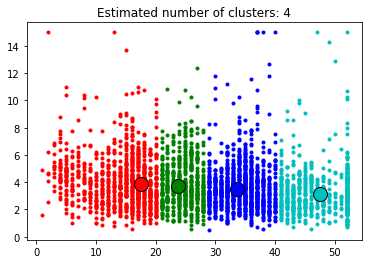

quantile value value: 0.250
Silhouette Coefficient: 0.521
Calinski harabasz Coefficient: 7015.397
number of estimated clusters : 3


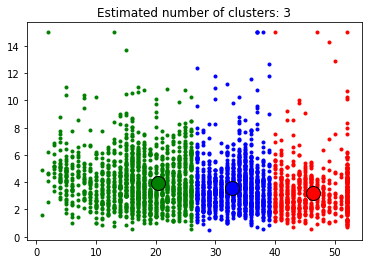

quantile value value: 0.300
Silhouette Coefficient: 0.570
Calinski harabasz Coefficient: 6438.051
number of estimated clusters : 2


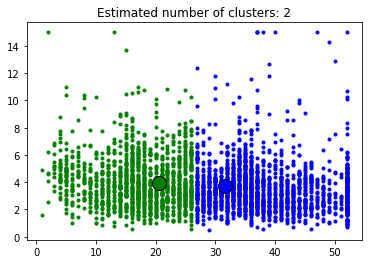

In [0]:
X=array
# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
quans=[0.1,0.2,0.25,0.3]

for i in quans:
  

  bandwidth = estimate_bandwidth(X, quantile=i, n_samples=5000)

  ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
  ms.fit(X)
  labels = ms.labels_
  cluster_centers = ms.cluster_centers_

  labels_unique = np.unique(labels)
  n_clusters_ = len(labels_unique)
  print('quantile value value: %0.3f' % i)
  print("Silhouette Coefficient: %0.3f"
        % metrics.silhouette_score(X, labels))

  print("Calinski harabasz Coefficient: %0.3f"
        % metrics.calinski_harabasz_score(X, labels))


  print("number of estimated clusters : %d" % n_clusters_)

  # #############################################################################
  # Plot result
  import matplotlib.pyplot as plt
  from itertools import cycle

  plt.figure(1)
  plt.clf()

  colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
  for k, col in zip(range(n_clusters_), colors):
      my_members = labels == k
      cluster_center = cluster_centers[k]
      plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
      plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
               markeredgecolor='k', markersize=14)
  plt.title('Estimated number of clusters: %d' % n_clusters_)
  plt.show()